In [ ]:
# Model Evaluation
Practical demonstration of regression and classification evaluation metrics.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)


In [2]:
#Regression evaluation
X, y = make_regression(n_samples=200, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))


MAE: 35.234595604348115
MSE: 1750.043293360269


TypeError: got an unexpected keyword argument 'squared'

In [3]:
#Classification evaluation
X, y = make_classification(
    n_samples=300,
    weights=[0.7, 0.3],
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
Confusion Matrix:
 [[47  2]
 [ 0 11]]

Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.85      1.00      0.92        11

    accuracy                           0.97        60
   macro avg       0.92      0.98      0.95        60
weighted avg       0.97      0.97      0.97        60



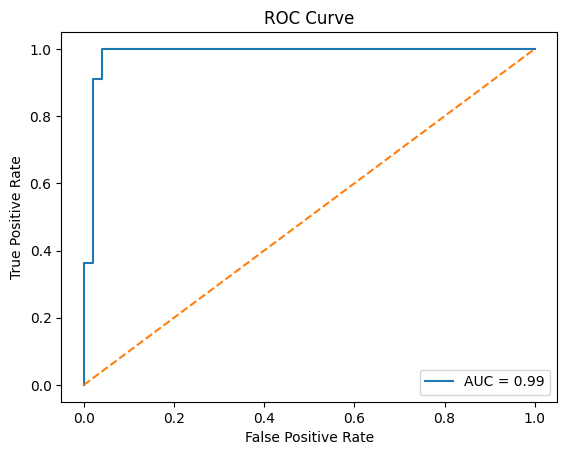

In [4]:
#ROC Curve
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
## Bias–Variance Intuition
- Underfitting → high bias
- Overfitting → high variance
- Cross-validation helps find balance


In [ ]:
## Key Takeaways
- Metric choice matters more than algorithm
- Accuracy is dangerous for imbalanced data
- ROC-AUC is threshold-independent
- Always evaluate on unseen data
